In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd

%matplotlib inline

In [3]:
dataset = pd.read_csv("/Users/salma/Studies/MachineLearning/ml_edureka/datasets/suv_data.csv")
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


### Data Analysis

In [24]:
list(dataset)

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']

In [41]:
dataset.describe().round(2)

# Interestingly, min salary is 15000 corresponding to min age of 18 #
# max salary of 150000 corresponding to max age of 60 #

,User ID,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00,400.00
mean,15691539.76,37.66,69742.50,0.36
std,71658.32,10.48,34096.96,0.48
min,15566689.00,18.00,15000.00,0.00
25%,15626763.75,29.75,43000.00,0.00
50%,15694341.50,37.00,70000.00,0.00
75%,15750363.00,46.00,88000.00,1.00
max,15815236.00,60.00,150000.00,1.00


<AxesSubplot:xlabel='Purchased', ylabel='count'>

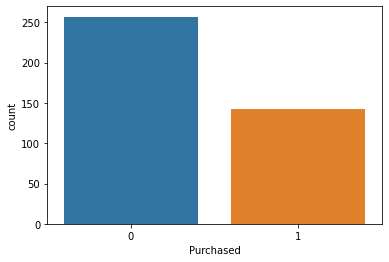

In [25]:
### Count of purchased and not purchased
import seaborn as sns

sns.countplot(x ='Purchased', data = dataset)

# Twice as likely to not purchase than to purchase #

<AxesSubplot:xlabel='Gender', ylabel='count'>

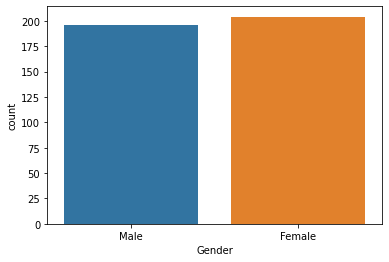

In [26]:
### Count of male and female
sns.countplot(x = 'Gender', data=dataset)

# similar purchasing stat for male and female #

<AxesSubplot:ylabel='Frequency'>

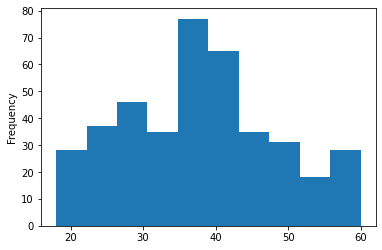

In [32]:
### Histogram for age
dataset['Age'].plot.hist()

# Most of the people in between 30 to 50 years age #

<AxesSubplot:ylabel='Frequency'>

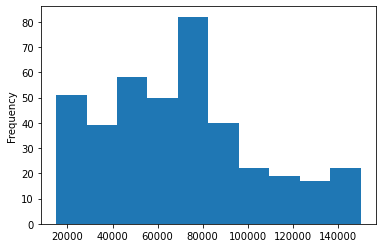

In [33]:
### Histogram for salary
dataset['EstimatedSalary'].plot.hist()

# Majority of the salary between 20k - 80k #

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Age'>

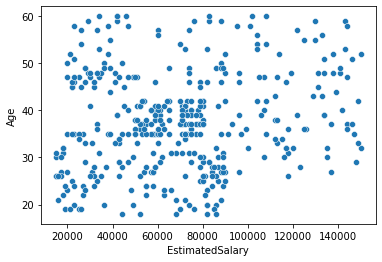

In [39]:
sns.scatterplot(x='EstimatedSalary', y='Age', data=dataset)

# No visible correlation between age and salary #

### Data Wrangling

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [35]:
dataset.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [36]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [5]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [8]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random state ensures same state or ensures that the same sample is taken every time we run the code

In [16]:
# Can scale input values for better performance
# preprocessing - contains all the methods and functionalities required to transform your data
from sklearn.preprocessing import StandardScaler

# Here we are working with large numbers (salary) even though the dataset is small. 
# When working in prod environmnets, we will have large datasets and be dealing with 
# thousands and thousands of tuples which will definitely affect the performance

In [18]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score(y_test, y_pred)*100

89.0